In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Phishing URL**

In [ ]:
data0 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/URL dataset.csv")
data0.head()

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [ ]:
data0.tail()

,url,type
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing
450174,http://atualizapj.com/,phishing
450175,http://writeassociate.com/test/Portal/inicio/I...,phishing


In [ ]:
data0 = data0.drop_duplicates(subset='url', keep='first')

In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   type    450176 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


In [ ]:
print("Dataset shape:", data0.shape)

Dataset shape: (450176, 2)


In [ ]:
data0.keys()

Index(['url', 'type'], dtype='object')

In [ ]:
data0['type'].value_counts()

,count
type,
legitimate,345738
phishing,104438


In [ ]:
legitimate = data0[data0['type'] == 'legitimate']
phishing = data0[data0['type'] == 'phishing']

legitimate_sample = legitimate.sample(n=len(phishing), random_state=1)

In [ ]:
data0 = pd.concat([legitimate_sample, phishing])

# Xem số lượng mỗi loại
print(data0['type'].value_counts())

type
legitimate    104438
phishing      104438
Name: count, dtype: int64


In [ ]:
data0['type'].value_counts()

,count
type,
legitimate,104438
phishing,104438


In [ ]:
data0['url'].value_counts()

,count
url,
https://www.amazon.co.uk/find-me-olwen-wymark-Books/s?ie=UTF8&keywords=find%20me%20olwen%20wymark&rh=n%3A266239%2Ck%3Afind%20me%20olwen%20wymark&page=1,1
http://royalgateenergy.com/wp-admin/js/images/httpdocs/docs.php,1
http://fbxvids.tk/index.xhtml,1
http://ava.unemat.br/ava/www.paypal.com/,1
http://ava.unemat.br/portal/www.paypal.com/websc-login.php?Go=_Restore_Start&amp;_Acess_Tooken=a088d5c2224a53d170ceea5ecfa895faa088d5c2224a53d170ceea5ecfa895fa,1
...,...
https://www.groups.yahoo.com/group/radioinmontreal/messages/16367,1
https://www.en.wikipedia.org/wiki/Petr_Zelenka,1
https://www.epinions.com/review/musc_mu-466891/content_136387989124,1


In [ ]:
n_samples, n_features = data0.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 208876
Number of features: 2


In [ ]:
data0.isnull().sum()

,0
url,0
type,0


In [ ]:
print(data0)

                                                      url        type
132451  https://www.amazon.co.uk/find-me-olwen-wymark-...  legitimate
69796                        https://www.marcelmusic.com/  legitimate
245437             https://www.mediafire.com/?j4ymvncnobm  legitimate
343915                       https://gray-seddon-tea.com/  legitimate
119926             https://www.wn.com/Quebec_St_Malo_Race  legitimate
...                                                   ...         ...
450171        http://ecct-it.com/docmmmnn/aptgd/index.php    phishing
450172  http://faboleena.com/js/infortis/jquery/plugin...    phishing
450173  http://faboleena.com/js/infortis/jquery/plugin...    phishing
450174                             http://atualizapj.com/    phishing
450175  http://writeassociate.com/test/Portal/inicio/I...    phishing

[208876 rows x 2 columns]


# PreProcessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data0["class_url"] = lb_make.fit_transform(data0["type"])
data0["class_url"].value_counts()

,count
class_url,
0,104438
1,104438


In [ ]:
def url_length(url):
    return len(str(url))

data0['url_length'] = data0['url'].apply(lambda i: url_length(i))
data0

,url,type,class_url,url_length
132451,https://www.amazon.co.uk/find-me-olwen-wymark-...,legitimate,0,151
69796,https://www.marcelmusic.com/,legitimate,0,28
245437,https://www.mediafire.com/?j4ymvncnobm,legitimate,0,38
343915,https://gray-seddon-tea.com/,legitimate,0,28
119926,https://www.wn.com/Quebec_St_Malo_Race,legitimate,0,38
...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing,1,43
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,159
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,147
450174,http://atualizapj.com/,phishing,1,22


In [ ]:
from urllib.parse import urlparse

def hostname_length(url):
    return len(urlparse(url).netloc)

data0['hostname_length'] = data0['url'].apply(lambda i: hostname_length(i))
data0

,url,type,class_url,url_length,hostname_length
132451,https://www.amazon.co.uk/find-me-olwen-wymark-...,legitimate,0,151,16
69796,https://www.marcelmusic.com/,legitimate,0,28,19
245437,https://www.mediafire.com/?j4ymvncnobm,legitimate,0,38,17
343915,https://gray-seddon-tea.com/,legitimate,0,28,19
119926,https://www.wn.com/Quebec_St_Malo_Race,legitimate,0,38,10
...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing,1,43,11
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,159,13
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,147,13
450174,http://atualizapj.com/,phishing,1,22,14


In [ ]:
def count_www(url):
    url.count('www')
    return url.count('www')

data0['count-www'] = data0['url'].apply(lambda i: count_www(i))
data0

,url,type,class_url,url_length,hostname_length,count-www
132451,https://www.amazon.co.uk/find-me-olwen-wymark-...,legitimate,0,151,16,1
69796,https://www.marcelmusic.com/,legitimate,0,28,19,1
245437,https://www.mediafire.com/?j4ymvncnobm,legitimate,0,38,17,1
343915,https://gray-seddon-tea.com/,legitimate,0,28,19,0
119926,https://www.wn.com/Quebec_St_Malo_Race,legitimate,0,38,10,1
...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing,1,43,11,0
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,159,13,0
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,147,13,0
450174,http://atualizapj.com/,phishing,1,22,14,0


In [ ]:
def count_https(url):
    return url.count('https')

data0['count-https'] = data0['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

data0['count-http'] = data0['url'].apply(lambda i : count_http(i))

In [ ]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

data0['count.'] = data0['url'].apply(lambda i: count_dot(i))

def count_per(url):
    return url.count('%')

data0['count%'] = data0['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

data0['count?'] = data0['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

data0['count-'] = data0['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

data0['count='] = data0['url'].apply(lambda i: count_equal(i))

def count_atrate(url):

    return url.count('@')

data0['count@'] = data0['url'].apply(lambda i: count_atrate(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

data0['count_dir'] = data0['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

data0['count_embed_domian'] = data0['url'].apply(lambda i: no_of_embed(i))
data0

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian
132451,https://www.amazon.co.uk/find-me-olwen-wymark-...,legitimate,0,151,16,1,1,1,3,9,1,4,4,0,2,0
69796,https://www.marcelmusic.com/,legitimate,0,28,19,1,1,1,2,0,0,0,0,0,1,0
245437,https://www.mediafire.com/?j4ymvncnobm,legitimate,0,38,17,1,1,1,2,0,1,0,0,0,1,0
343915,https://gray-seddon-tea.com/,legitimate,0,28,19,0,1,1,1,0,0,2,0,0,1,0
119926,https://www.wn.com/Quebec_St_Malo_Race,legitimate,0,38,10,1,1,1,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing,1,43,11,0,0,1,2,0,0,1,0,0,3,0
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,159,13,0,0,1,2,0,0,0,1,0,12,0
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,147,13,0,0,1,1,0,0,0,1,0,12,0
450174,http://atualizapj.com/,phishing,1,22,14,0,0,1,1,0,0,0,0,0,1,0


In [ ]:
import re

def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adataset\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

data0['short_url'] = data0['url'].apply(lambda i: shortening_service(i))

In [ ]:
!pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 4.1 MB/s eta 0:00:00


In [ ]:
from tld import get_tld
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

data0['fd_length'] = data0['url'].apply(lambda i: fd_length(i))

data0['tld'] = data0['url'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

data0['tld_length'] = data0['tld'].apply(lambda i: tld_length(i))
data0

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length
132451,https://www.amazon.co.uk/find-me-olwen-wymark-...,legitimate,0,151,16,1,1,1,3,9,1,4,4,0,2,0,0,26,co.uk,5
69796,https://www.marcelmusic.com/,legitimate,0,28,19,1,1,1,2,0,0,0,0,0,1,0,0,0,com,3
245437,https://www.mediafire.com/?j4ymvncnobm,legitimate,0,38,17,1,1,1,2,0,1,0,0,0,1,0,0,0,com,3
343915,https://gray-seddon-tea.com/,legitimate,0,28,19,0,1,1,1,0,0,2,0,0,1,0,0,0,com,3
119926,https://www.wn.com/Quebec_St_Malo_Race,legitimate,0,38,10,1,1,1,2,0,0,0,0,0,1,0,0,19,com,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing,1,43,11,0,0,1,2,0,0,1,0,0,3,0,1,8,com,3
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,159,13,0,0,1,2,0,0,0,1,0,12,0,0,2,com,3
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,147,13,0,0,1,1,0,0,0,1,0,12,0,0,2,com,3
450174,http://atualizapj.com/,phishing,1,22,14,0,0,1,1,0,0,0,0,0,1,0,0,0,com,3


In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

data0['sus_url'] = data0['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

data0['count-digits']= data0['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


data0['count-letters']= data0['url'].apply(lambda i: letter_count(i))
data0

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters
132451,https://www.amazon.co.uk/find-me-olwen-wymark-...,legitimate,0,151,16,1,1,1,3,9,...,0,2,0,0,26,co.uk,5,0,23,99
69796,https://www.marcelmusic.com/,legitimate,0,28,19,1,1,1,2,0,...,0,1,0,0,0,com,3,0,0,22
245437,https://www.mediafire.com/?j4ymvncnobm,legitimate,0,38,17,1,1,1,2,0,...,0,1,0,0,0,com,3,0,1,30
343915,https://gray-seddon-tea.com/,legitimate,0,28,19,0,1,1,1,0,...,0,1,0,0,0,com,3,0,0,21
119926,https://www.wn.com/Quebec_St_Malo_Race,legitimate,0,38,10,1,1,1,2,0,...,0,1,0,0,19,com,3,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing,1,43,11,0,0,1,2,0,...,0,3,0,1,8,com,3,0,0,34
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,159,13,0,0,1,2,0,...,0,12,0,0,2,com,3,0,21,118
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,147,13,0,0,1,1,0,...,0,12,0,0,2,com,3,0,20,109
450174,http://atualizapj.com/,phishing,1,22,14,0,0,1,1,0,...,0,1,0,0,0,com,3,0,0,17


In [ ]:
import re
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    # Escape special characters in hostname before using it in regex
    hostname = re.escape(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

data0['abnormal_url'] = data0['url'].apply(lambda i: abnormal_url(i))
data0

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url
132451,https://www.amazon.co.uk/find-me-olwen-wymark-...,legitimate,0,151,16,1,1,1,3,9,...,2,0,0,26,co.uk,5,0,23,99,1
69796,https://www.marcelmusic.com/,legitimate,0,28,19,1,1,1,2,0,...,1,0,0,0,com,3,0,0,22,1
245437,https://www.mediafire.com/?j4ymvncnobm,legitimate,0,38,17,1,1,1,2,0,...,1,0,0,0,com,3,0,1,30,1
343915,https://gray-seddon-tea.com/,legitimate,0,28,19,0,1,1,1,0,...,1,0,0,0,com,3,0,0,21,1
119926,https://www.wn.com/Quebec_St_Malo_Race,legitimate,0,38,10,1,1,1,2,0,...,1,0,0,19,com,3,0,0,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing,1,43,11,0,0,1,2,0,...,3,0,1,8,com,3,0,0,34,1
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,159,13,0,0,1,2,0,...,12,0,0,2,com,3,0,21,118,1
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,147,13,0,0,1,1,0,...,12,0,0,2,com,3,0,20,109,1
450174,http://atualizapj.com/,phishing,1,22,14,0,0,1,1,0,...,1,0,0,0,com,3,0,0,17,1


In [ ]:
#Use of IP or not in domain
def having_ip_address(url: str) -> int:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
data0['use_of_ip_address'] = data0['url'].apply(lambda i: having_ip_address(i))
data0

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address
132451,https://www.amazon.co.uk/find-me-olwen-wymark-...,legitimate,0,151,16,1,1,1,3,9,...,0,0,26,co.uk,5,0,23,99,1,0
69796,https://www.marcelmusic.com/,legitimate,0,28,19,1,1,1,2,0,...,0,0,0,com,3,0,0,22,1,0
245437,https://www.mediafire.com/?j4ymvncnobm,legitimate,0,38,17,1,1,1,2,0,...,0,0,0,com,3,0,1,30,1,0
343915,https://gray-seddon-tea.com/,legitimate,0,28,19,0,1,1,1,0,...,0,0,0,com,3,0,0,21,1,0
119926,https://www.wn.com/Quebec_St_Malo_Race,legitimate,0,38,10,1,1,1,2,0,...,0,0,19,com,3,0,0,29,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing,1,43,11,0,0,1,2,0,...,0,1,8,com,3,0,0,34,1,0
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,159,13,0,0,1,2,0,...,0,0,2,com,3,0,21,118,1,0
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,147,13,0,0,1,1,0,...,0,0,2,com,3,0,20,109,1,0
450174,http://atualizapj.com/,phishing,1,22,14,0,0,1,1,0,...,0,0,0,com,3,0,0,17,1,0


In [ ]:
data0['use_of_ip_address'].value_counts()

,count
use_of_ip_address,
0,205962
1,2914


In [ ]:
!pip install googlesearch-python

In [ ]:
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
data0['google_index'] = data0['url'].apply(lambda i: google_index(i))
data0

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address,google_index
132451,https://www.amazon.co.uk/find-me-olwen-wymark-...,legitimate,0,151,16,1,1,1,3,9,...,0,26,co.uk,5,0,23,99,1,0,1
69796,https://www.marcelmusic.com/,legitimate,0,28,19,1,1,1,2,0,...,0,0,com,3,0,0,22,1,0,1
245437,https://www.mediafire.com/?j4ymvncnobm,legitimate,0,38,17,1,1,1,2,0,...,0,0,com,3,0,1,30,1,0,1
343915,https://gray-seddon-tea.com/,legitimate,0,28,19,0,1,1,1,0,...,0,0,com,3,0,0,21,1,0,1
119926,https://www.wn.com/Quebec_St_Malo_Race,legitimate,0,38,10,1,1,1,2,0,...,0,19,com,3,0,0,29,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing,1,43,11,0,0,1,2,0,...,1,8,com,3,0,0,34,1,0,1
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,159,13,0,0,1,2,0,...,0,2,com,3,0,21,118,1,0,1
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1,147,13,0,0,1,1,0,...,0,2,com,3,0,20,109,1,0,1
450174,http://atualizapj.com/,phishing,1,22,14,0,0,1,1,0,...,0,0,com,3,0,0,17,1,0,1


In [ ]:
data0.isnull().sum()

,0
url,0
type,0
class_url,0
url_length,0
hostname_length,0
count-www,0
count-https,0
count-http,0
count.,0
count%,0


In [ ]:
data0.shape

(208876, 26)

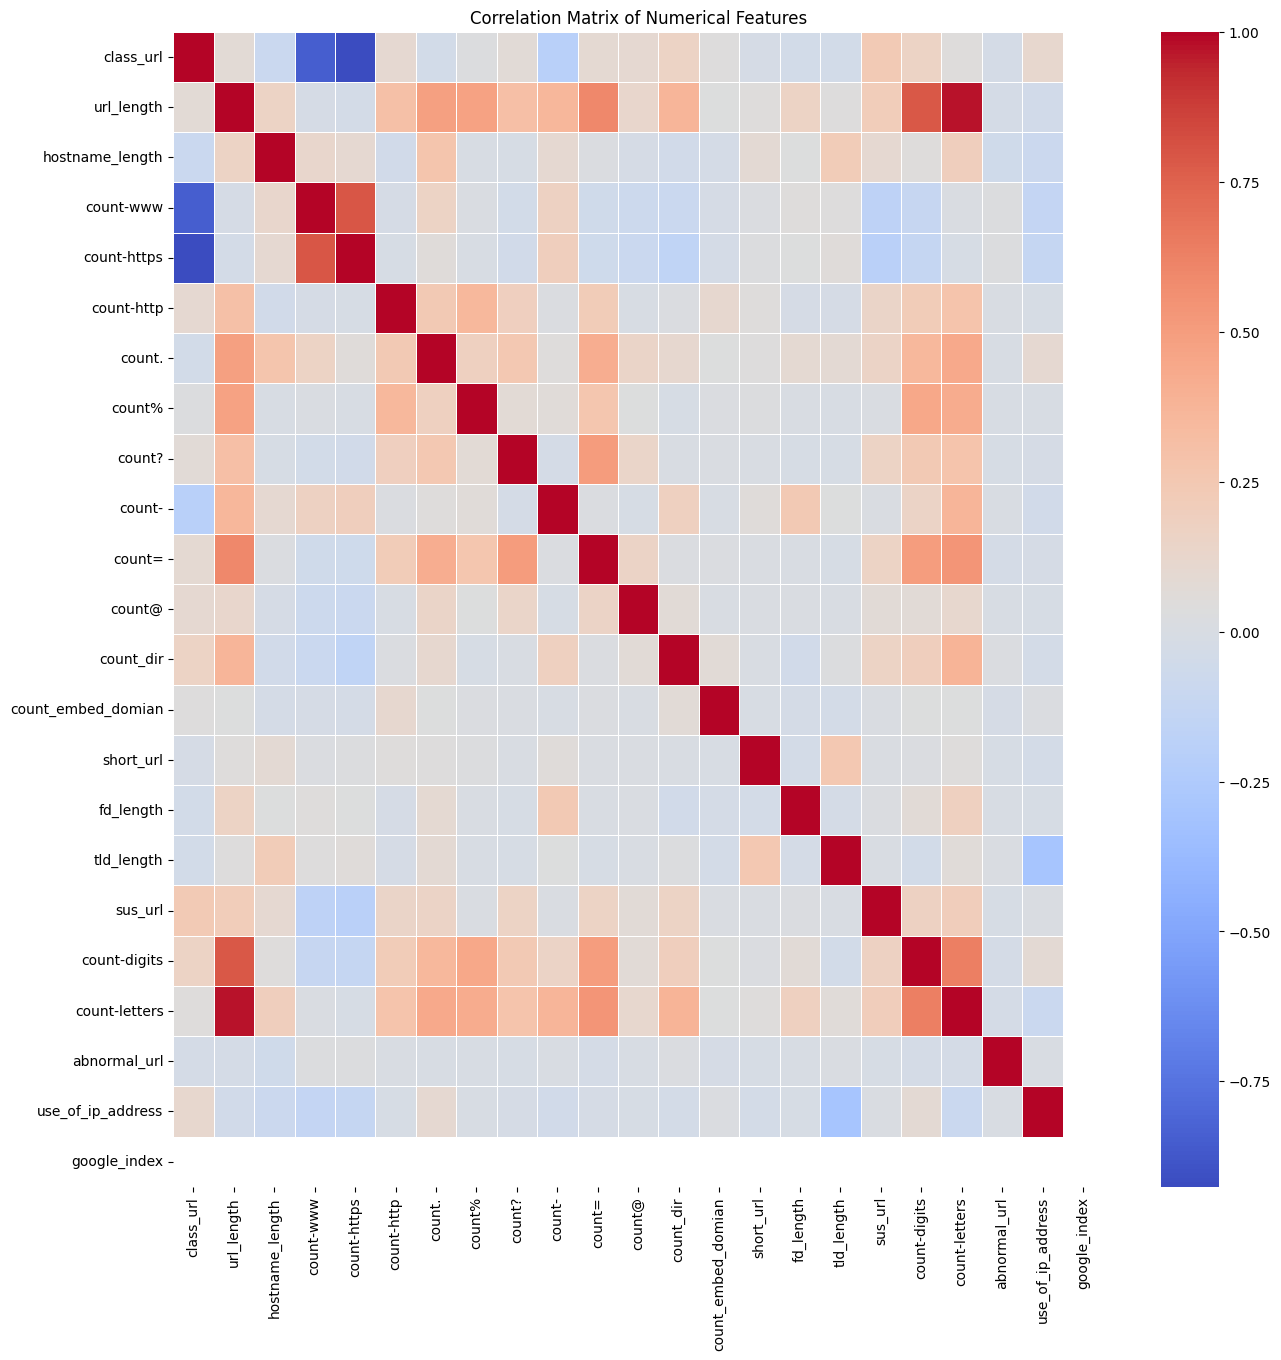

In [ ]:
numerical_features = data0.select_dtypes(include=np.number).columns
corr_matrix = data0[numerical_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

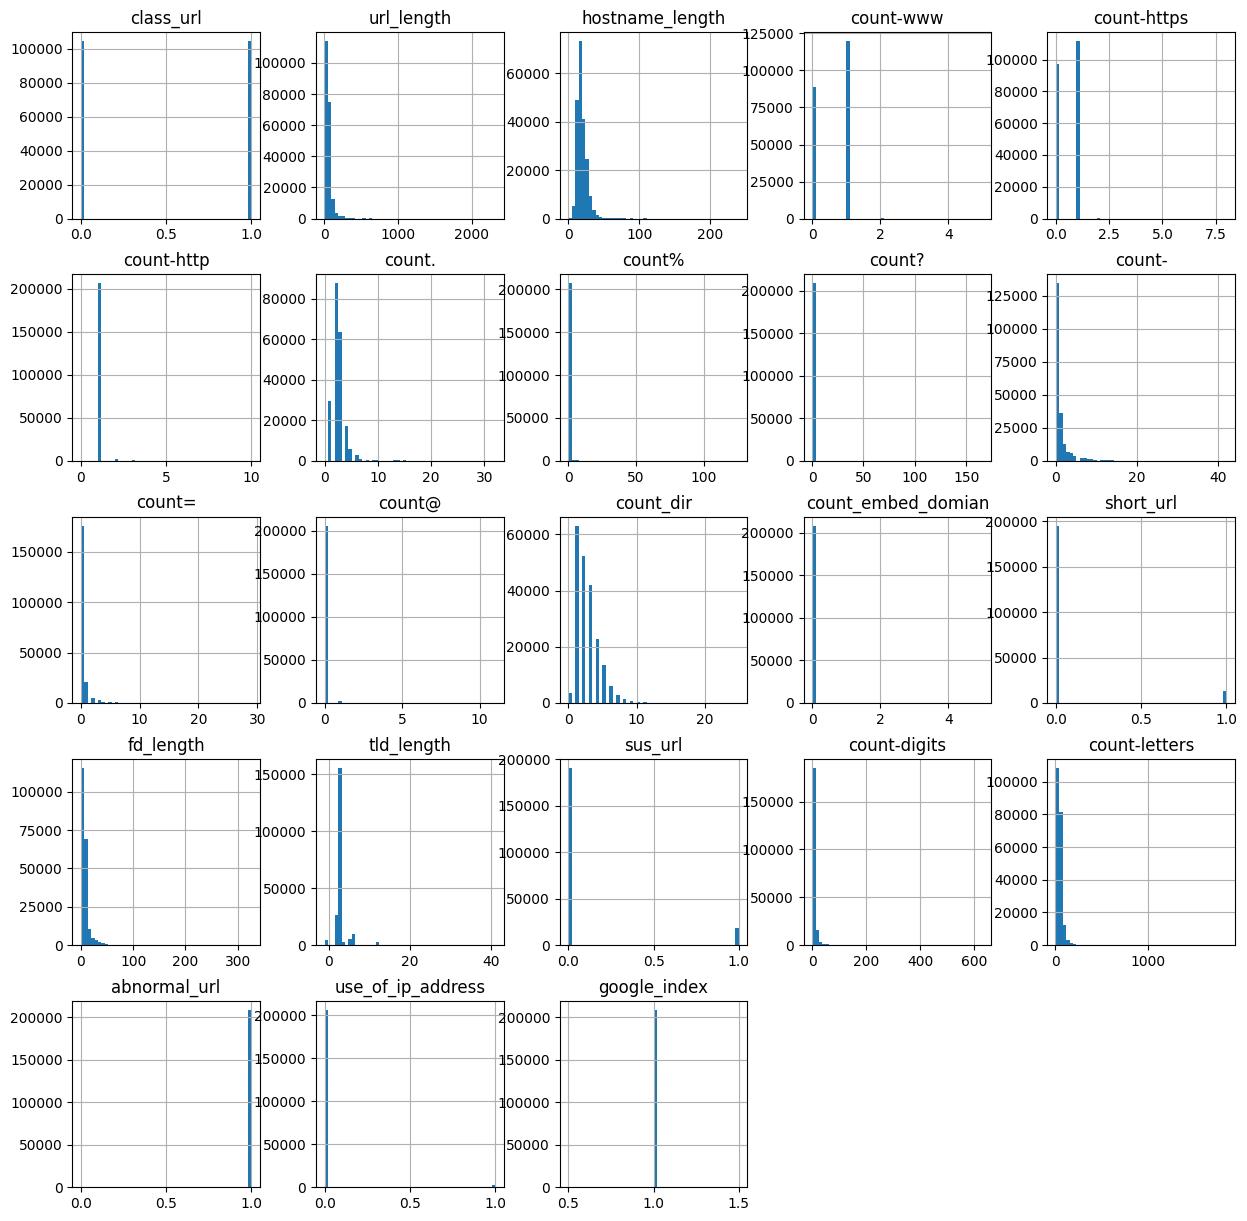

In [ ]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

# Model Training

In [ ]:
X = data0[['use_of_ip_address','abnormal_url', 'google_index', 'count-www', 'count@',
           'count_dir', 'count_embed_domian', 'short_url', 'count-https',
           'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
           'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
           'count-letters']]

y = data0['class_url']

In [ ]:
X

,use_of_ip_address,abnormal_url,google_index,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
132451,0,1,1,1,0,2,0,0,1,1,...,1,4,4,151,16,0,26,5,23,99
69796,0,1,1,1,0,1,0,0,1,1,...,0,0,0,28,19,0,0,3,0,22
245437,0,1,1,1,0,1,0,0,1,1,...,1,0,0,38,17,0,0,3,1,30
343915,0,1,1,0,0,1,0,0,1,1,...,0,2,0,28,19,0,0,3,0,21
119926,0,1,1,1,0,1,0,0,1,1,...,0,0,0,38,10,0,19,3,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,0,1,1,0,0,3,0,1,0,1,...,0,1,0,43,11,0,8,3,0,34
450172,0,1,1,0,0,12,0,0,0,1,...,0,0,1,159,13,0,2,3,21,118
450173,0,1,1,0,0,12,0,0,0,1,...,0,0,1,147,13,0,2,3,20,109
450174,0,1,1,0,0,1,0,0,0,1,...,0,0,0,22,14,0,0,3,0,17


In [ ]:
y

,class_url
132451,0
69796,0
245437,0
343915,0
119926,0
...,...
450171,1
450172,1
450173,1
450174,1


In [ ]:
data0.columns

Index(['url', 'type', 'class_url', 'url_length', 'hostname_length',
       'count-www', 'count-https', 'count-http', 'count.', 'count%', 'count?',
       'count-', 'count=', 'count@', 'count_dir', 'count_embed_domian',
       'short_url', 'fd_length', 'tld', 'tld_length', 'sus_url',
       'count-digits', 'count-letters', 'abnormal_url', 'use_of_ip_address',
       'google_index'],
      dtype='object')

In [ ]:
data0.to_csv('extracted_url_dataset.csv',index=False)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, shuffle=True, random_state=12)

In [ ]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (146213, 21)
Y_train Shape : (146213,)
X_test  Shape : (62663, 21)
Y_test  Shape : (62663,)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import time

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
precision=[]
recall=[]
f1=[]
accuracy = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  precision.append(round(a, 3))
  recall.append(round(b, 3))
  f1.append(round(c, 3))
  accuracy.append(round(d, 3))




## Decision Tree

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
tree = DecisionTreeClassifier(max_depth = 5,criterion = 'entropy')
tree.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

Model training completed in 0.50 seconds.


In [ ]:
#predicting the target value from the model for the samples
y_pred_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
precision_tree = precision_score(y_test,y_pred_tree)
recall_tree = recall_score(y_test,y_pred_tree)
f1_tree = f1_score(y_test,y_pred_tree)
accuracy_tree = accuracy_score(y_test,y_pred_tree)

#print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Precision on test Data: {:.3f}".format(precision_tree))
print("Decision Tree: Recall on test Data: {:.3f}".format(recall_tree))
print("Decision Tree: F-Measure on test Data: {:.3f}".format(f1_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(accuracy_tree))

report = classification_report(y_test, y_pred_tree, target_names=['Benign (0)', 'Malicious (1)'])
print("\nClassification Report:\n", report)

Decision Tree: Precision on test Data: 0.998
Decision Tree: Recall on test Data: 0.993
Decision Tree: F-Measure on test Data: 0.995
Decision Tree: Accuracy on test Data: 0.995

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.99      1.00      1.00     31331
Malicious (1)       1.00      0.99      1.00     31332

     accuracy                           1.00     62663
    macro avg       1.00      1.00      1.00     62663
 weighted avg       1.00      1.00      1.00     62663



In [ ]:
storeResults('Decision Tree', precision_tree,recall_tree,f1_tree,accuracy_tree)

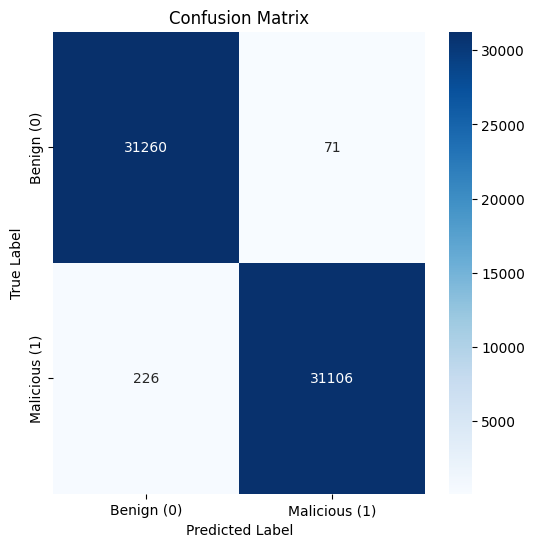

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Random Forest

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
forest = RandomForestClassifier(n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42)
forest.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

Model training completed in 25.47 seconds.


In [ ]:
y_pred_forest = forest.predict(X_test)
#y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
precision_forest = precision_score(y_test,y_pred_forest)
recall_forest = recall_score(y_test,y_pred_forest)
f1_forest = f1_score(y_test,y_pred_forest)
accuracy_forest = accuracy_score(y_test,y_pred_forest)

print("Random Tree: Precision on test Data: {:.3f}".format(precision_forest))
print("Random forest: Recall on test Data: {:.3f}".format(recall_forest))
print("Random forest: F-Measure on test Data: {:.3f}".format(f1_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(accuracy_forest))

report = classification_report(y_test, y_pred_forest, target_names=['Benign (0)', 'Malicious (1)'])
print("\nClassification Report:\n", report)

Random Tree: Precision on test Data: 0.998
Random forest: Recall on test Data: 0.993
Random forest: F-Measure on test Data: 0.996
Random forest: Accuracy on test Data: 0.996

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.99      1.00      1.00     31331
Malicious (1)       1.00      0.99      1.00     31332

     accuracy                           1.00     62663
    macro avg       1.00      1.00      1.00     62663
 weighted avg       1.00      1.00      1.00     62663



In [ ]:
storeResults('Random Forest', precision_forest,recall_forest,f1_forest,accuracy_forest)

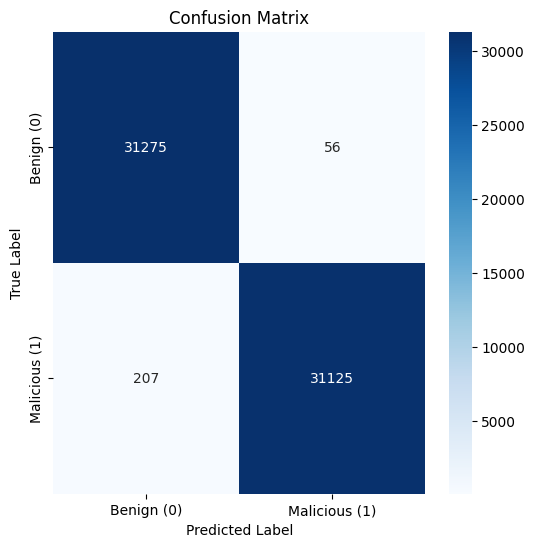

In [ ]:
cm = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## XGBoost

In [ ]:
# #XGBoost Classification model
# import xgboost as xgb

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

# train_data = xgb.DMatrix(X_train, label=y_train)
# val_data = xgb.DMatrix(X_val, label=y_val)
# test_data = xgb.DMatrix(X_test, label=y_test)

# # Set parameters for XGBoost
# params = {
#     'objective': 'binary:logistic',
#     'eval_metric': 'logloss',
#     'learning_rate': 0.05,        # Giảm từ 0.05 xuống 0.01 để học chậm hơn
#     'max_depth': 3,               # Giảm từ 5 xuống 3 để giảm độ phức tạp của cây
#     'min_child_weight': 20,
#     'subsample': 0.7,
#     'colsample_bytree': 0.7,
#     'lambda': 5,                  # Tăng L2 regularization từ 2 lên 5
#     'alpha': 5,                   # Tăng L1 regularization từ 2 lên 5
#     'seed': 42
# }

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

start_time = time.time()
xgb_model = xgb.XGBClassifier(n_estimators= 100)
xgb_model.fit(X_train,y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

y_pred_xgb = xgb_model.predict(X_test)


precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb = recall_score(y_test,y_pred_xgb)
f1_xgb = f1_score(y_test,y_pred_xgb)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)

print("XGBoost: Precision on test Data: {:.3f}".format(precision_xgb))
print("XGBoost: Recall on test Data: {:.3f}".format(recall_xgb))
print("XGBoost: F-Measure on test Data: {:.3f}".format(f1_xgb))
print("XGBoost: Accuracy on test Data: {:.3f}".format(accuracy_xgb))

report = classification_report(y_test, y_pred_forest, target_names=['Benign (0)', 'Malicious (1)'])
print("\nClassification Report:\n", report)

Model training completed in 9.54 seconds.
XGBoost: Precision on test Data: 0.998
XGBoost: Recall on test Data: 0.994
XGBoost: F-Measure on test Data: 0.996
XGBoost: Accuracy on test Data: 0.996

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.99      1.00      1.00     31331
Malicious (1)       1.00      0.99      1.00     31332

     accuracy                           1.00     62663
    macro avg       1.00      1.00      1.00     62663
 weighted avg       1.00      1.00      1.00     62663



In [ ]:
storeResults('XGBoost', precision_xgb,recall_xgb,f1_xgb,accuracy_xgb)

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_decision_tree.png')
plt.close()

# k nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
start_time = time.time()
y_pred_knnc = classifier.predict(X_test)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

Model training completed in 207.66 seconds.


In [ ]:
#computing the accuracy of the model performance
precision_knnc = precision_score(y_test,y_pred_knnc)
recall_knnc = recall_score(y_test,y_pred_knnc)
f1_knnc = f1_score(y_test,y_pred_knnc)
accuracy_knnc = accuracy_score(y_test,y_pred_knnc)

print("K Nearest Neighbours: Precision on test Data: {:.3f}".format(precision_knnc))
print("K Nearest Neighbours: Recall on test Data: {:.3f}".format(recall_knnc))
print("K Nearest Neighbours: F-Measure on test Data: {:.3f}".format(f1_knnc))
print("K Nearest Neighbours: Accuracy on test Data: {:.3f}".format(accuracy_knnc))

K Nearest Neighbours: Precision on test Data: 0.956
K Nearest Neighbours: Recall on test Data: 0.914
K Nearest Neighbours: F-Measure on test Data: 0.934
K Nearest Neighbours: Accuracy on test Data: 0.936


In [ ]:
storeResults('K Nearest Neighbours', precision_knnc,recall_knnc,f1_knnc,accuracy_knnc)

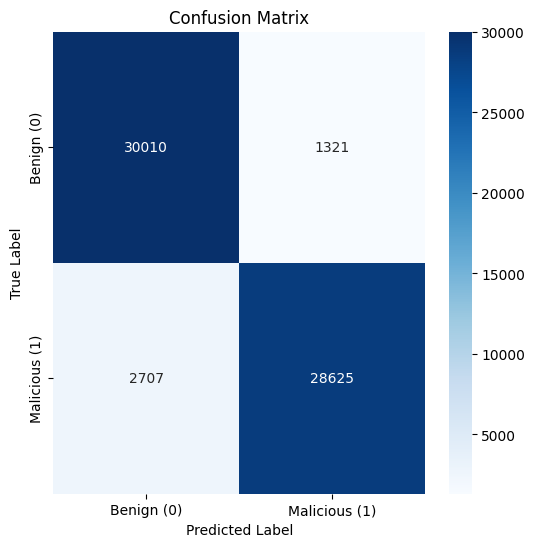

In [ ]:
cm = confusion_matrix(y_test, y_pred_knnc)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# #logistic regression

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
start_time = time.time()
lr_regression = LogisticRegression(C=1,max_iter=1000,random_state=0,solver='lbfgs')
lr_regression.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

Model training completed in 25.50 seconds.


In [ ]:
#predicting the target value from the model for the samples
y_pred_lr = lr_regression.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_lr = precision_score(y_test,y_pred_lr)
recall_lr = recall_score(y_test,y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)
accuracy_lr = accuracy_score(y_test,y_pred_lr)

print("Logistic Regression: Precision on test Data: {:.3f}".format(precision_lr))
print("Logistic Regression: Recall on test Data: {:.3f}".format(recall_lr))
print("Logistic Regression: F-Measure on test Data: {:.3f}".format(f1_lr))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(accuracy_lr))

Logistic Regression: Precision on test Data: 0.998
Logistic Regression: Recall on test Data: 0.992
Logistic Regression: F-Measure on test Data: 0.995
Logistic Regression: Accuracy on test Data: 0.995


In [ ]:
storeResults('Logistic Regression', precision_lr,recall_lr,f1_lr,accuracy_lr)

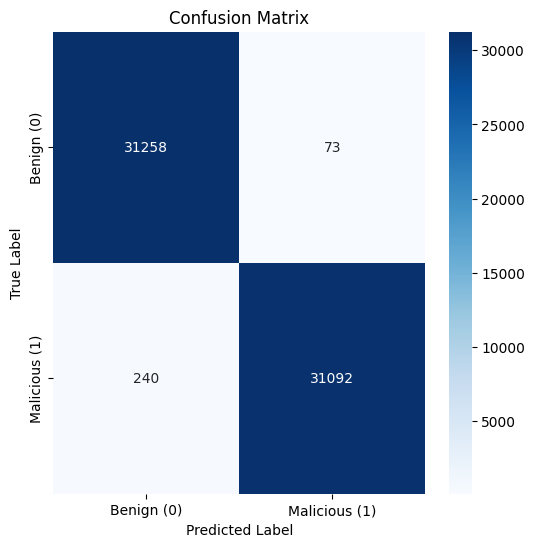

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV


param_grid = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}


grid_search = GridSearchCV(
    estimator=LinearDiscriminantAnalysis(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


lda_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 716, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/d

Model training completed in 14.10 seconds.
Best Parameters: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best Score: 0.9818689702108468


In [ ]:
y_pred_lda = lda_model.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_lda = precision_score(y_test,y_pred_lda)
recall_lda = recall_score(y_test,y_pred_lda)
f1_lda = f1_score(y_test,y_pred_lda)
accuracy_lda = accuracy_score(y_test,y_pred_lda)

print("Logistic Regression: Precision on test Data: {:.3f}".format(precision_lda))
print("Logistic Regression: Recall on test Data: {:.3f}".format(recall_lda))
print("Logistic Regression: F-Measure on test Data: {:.3f}".format(f1_lda))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(accuracy_lda))

Logistic Regression: Precision on test Data: 0.998
Logistic Regression: Recall on test Data: 0.982
Logistic Regression: F-Measure on test Data: 0.990
Logistic Regression: Accuracy on test Data: 0.990


In [ ]:
storeResults('LDA', precision_lda,recall_lda,f1_lda,accuracy_lda)

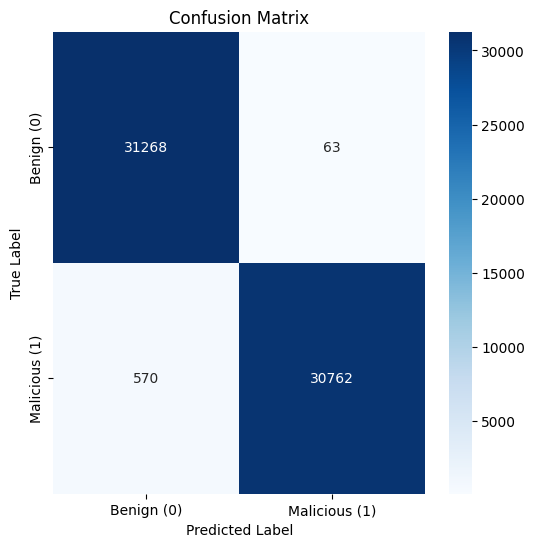

In [ ]:
cm = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(objective='multiclass', num_class=2, boosting_type='gbdt', n_jobs=5, silent=True, random_state=5)

LGB_C = lgb.fit(X_train, y_train)

y_pred_lgb = LGB_C.predict(X_test)


precision_lgb = precision_score(y_test,y_pred_lgb)
recall_lgb = recall_score(y_test,y_pred_lgb)
f1_lgb = f1_score(y_test,y_pred_lgb)
accuracy_lgb = accuracy_score(y_test,y_pred_lgb)

print("LightGBM: Precision on test Data: {:.3f}".format(precision_lgb))
print("LightGBM: Recall on test Data: {:.3f}".format(recall_lgb))
print("LightGBM: F-Measure on test Data: {:.3f}".format(f1_lgb))
print("LightGBM: Accuracy on test Data: {:.3f}".format(accuracy_lgb))

report = classification_report(y_test, y_pred_lgb, target_names=['Benign (0)', 'Malicious (1)'])
print("\nClassification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1111
[LightGBM] [Info] Number of data points in the train set: 146213, number of used features: 20
[LightGBM] [Info] Start training from score -0.693140
[LightGBM] [Info] Start training from score -0.693154
[LightGBM] [Warning] Unknown parameter: silent
LightGBM: Precision on test Data: 0.998
LightGBM: Recall on test Data: 0.994
LightGBM: F-Measure on test Data: 0.996
LightGBM: Accuracy on test Data: 0.996

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.99      1.00      1.00     31331
Malicious (1)       1.00      0.99      1.00     31332

     accuracy                           1.00     

In [ ]:
storeResults('LightGBM', precision_lgb,recall_lgb,f1_lgb,accuracy_lgb)

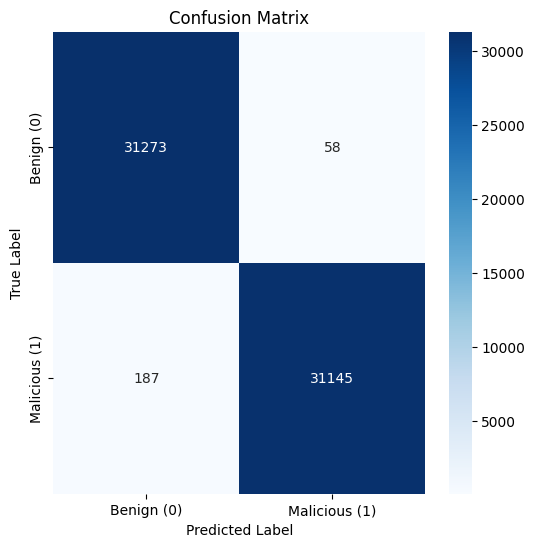

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Ada Boost Classifier

In [ ]:
#ada boost model
from sklearn.ensemble import AdaBoostClassifier
ab_classifier = AdaBoostClassifier(n_estimators=100,
    learning_rate=0.1,
    random_state=0)
ab_classifier.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=0)

In [ ]:
#predicting the target value from the model for the samples
y_pred_ada = ab_classifier.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_ada = precision_score(y_test,y_pred_ada)
recall_ada = recall_score(y_test,y_pred_ada)
f1_ada = f1_score(y_test,y_pred_ada)
accuracy_ada = accuracy_score(y_test,y_pred_ada)

print("Adaptive Boost: Precision on test Data: {:.3f}".format(precision_ada))
print("Adaptive Boost: Recall on test Data: {:.3f}".format(recall_ada))
print("Adaptive Boost: F-Measure on test Data: {:.3f}".format(f1_ada))
print("Adaptive Boost: Accuracy on test Data: {:.3f}".format(accuracy_ada))

Adaptive Boost: Precision on test Data: 0.998
Adaptive Boost: Recall on test Data: 0.987
Adaptive Boost: F-Measure on test Data: 0.992
Adaptive Boost: Accuracy on test Data: 0.992


In [ ]:
storeResults('Ada Boost', precision_ada,recall_ada,f1_ada,accuracy_ada)

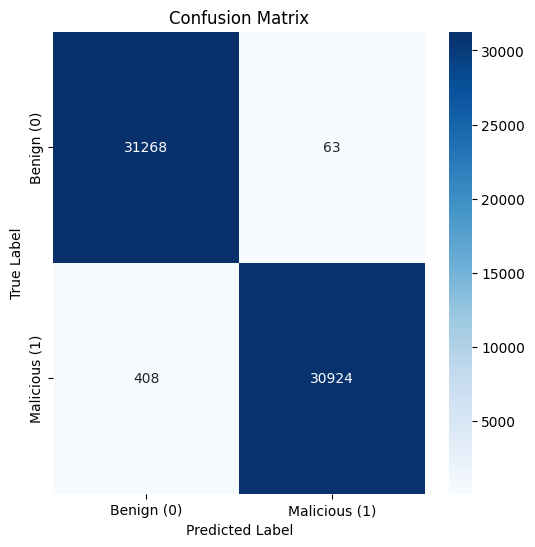

In [ ]:
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# GaussianNB


In [ ]:
from sklearn.naive_bayes import GaussianNB

gn = GaussianNB()
gn.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred_gn = gn.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_gn = precision_score(y_test,y_pred_gn)
recall_gn = recall_score(y_test,y_pred_gn)
f1_gn = f1_score(y_test,y_pred_gn)
accuracy_gn = accuracy_score(y_test,y_pred_gn)

print("GausianNB: Precision on test Data: {:.3f}".format(precision_gn))
print("GausianNB: Recall on test Data: {:.3f}".format(recall_gn))
print("GausianNB: F-Measure on test Data: {:.3f}".format(f1_gn))
print("GausianNB: Accuracy on test Data: {:.3f}".format(accuracy_gn))

GausianNB: Precision on test Data: 0.992
GausianNB: Recall on test Data: 0.994
GausianNB: F-Measure on test Data: 0.993
GausianNB: Accuracy on test Data: 0.993


In [ ]:
storeResults('GausianNB', precision_gn,recall_gn,f1_gn,accuracy_gn)

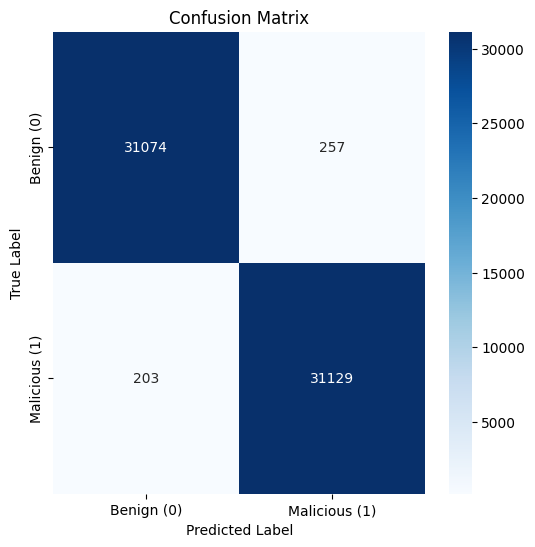

In [ ]:
cm = confusion_matrix(y_test, y_pred_gn)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Comparison of Model

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Precision': precision,
    'Recall' : recall,
    'F-Measure':f1,
    'Accuracy': accuracy})

results

,ML Model,Precision,Recall,F-Measure,Accuracy
0,Decision Tree,0.998,0.993,0.995,0.995
1,Random Forest,0.998,0.993,0.996,0.996
2,XGBoost,0.998,0.994,0.996,0.996
3,K Nearest Neighbours,0.956,0.914,0.934,0.936
4,Logistic Regression,0.998,0.992,0.995,0.995
5,LDA,0.998,0.982,0.990,0.990
6,LightGBM,0.998,0.994,0.996,0.996
7,Ada Boost,0.998,0.987,0.992,0.992
8,GausianNB,0.992,0.994,0.993,0.993


In [ ]:
results.sort_values(by=['F-Measure', 'Accuracy'], ascending=False)

,ML Model,Precision,Recall,F-Measure,Accuracy
1,Random Forest,0.998,0.993,0.996,0.996
2,XGBoost,0.998,0.994,0.996,0.996
6,LightGBM,0.998,0.994,0.996,0.996
0,Decision Tree,0.998,0.993,0.995,0.995
4,Logistic Regression,0.998,0.992,0.995,0.995
8,GausianNB,0.992,0.994,0.993,0.993
7,Ada Boost,0.998,0.987,0.992,0.992
5,LDA,0.998,0.982,0.990,0.990
3,K Nearest Neighbours,0.956,0.914,0.934,0.936


Mạc dù XGBoost có kết quả cao, nhưng kén bộ dư liệu, kết quả cao nhưng khả năng dự đoán của mô hình thấp

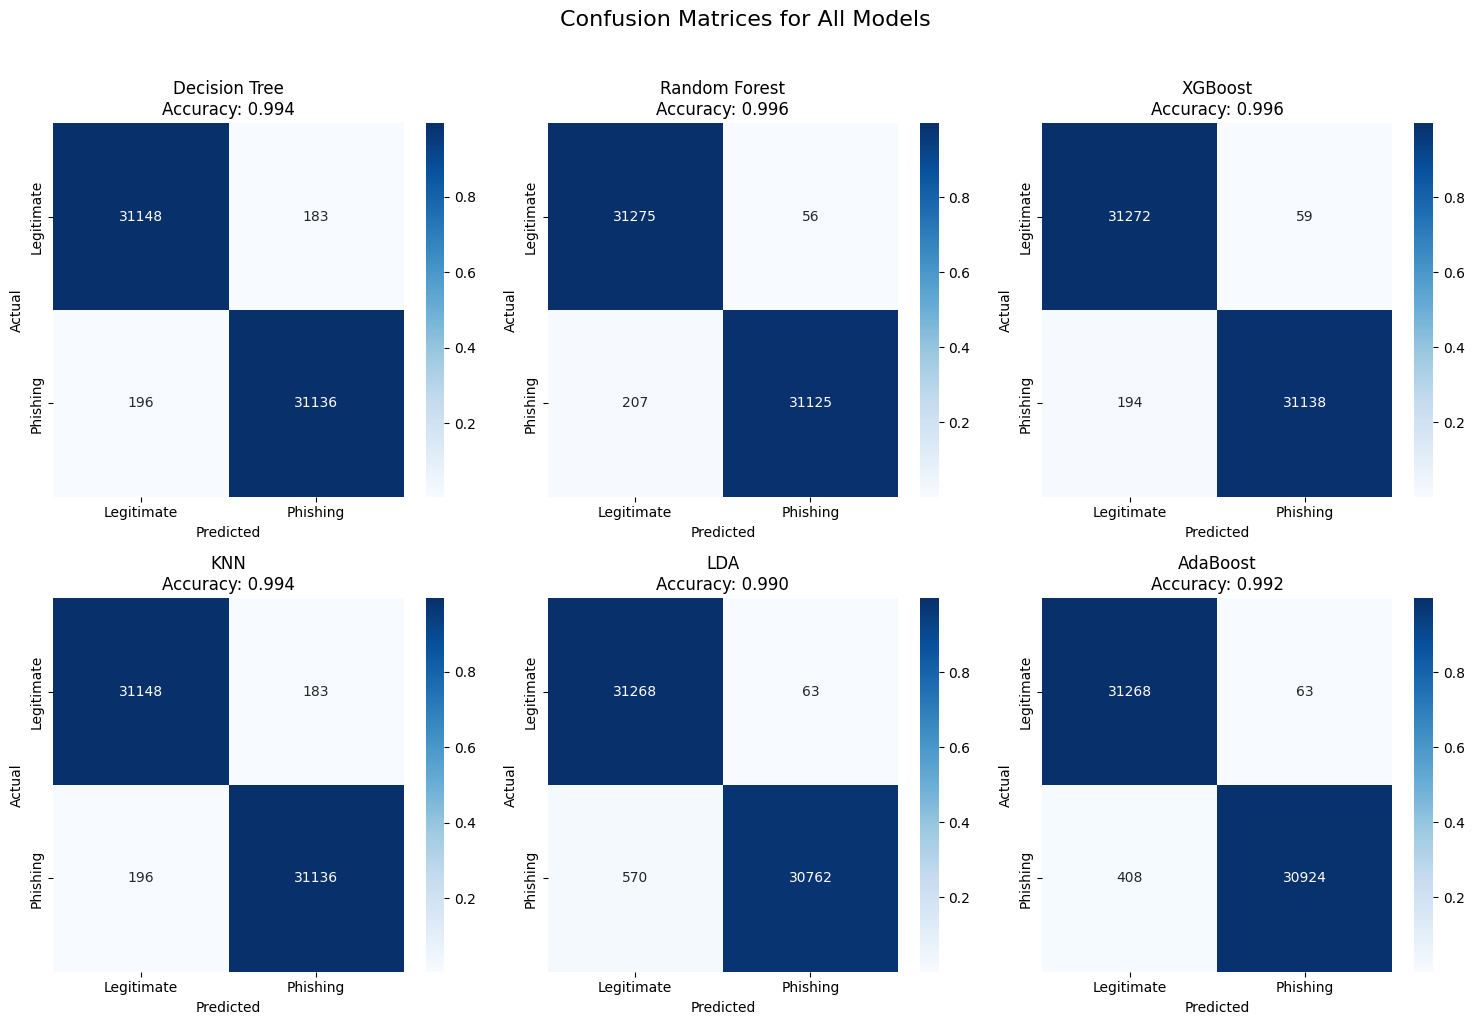

In [ ]:
def plot_combined_confusion_matrices(models, X_test, y_test):
    n_models = len(models)
    n_cols = 3
    n_rows = (n_models + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Confusion Matrices for All Models', fontsize=16, y=1.02)


    if n_rows > 1:
        axes = axes.flatten()


    cmap = plt.cm.Blues

    for idx, (name, model) in enumerate(models.items()):

        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)


        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        sns.heatmap(cm_norm, annot=cm, fmt='d', cmap=cmap,
                    xticklabels=['Legitimate', 'Phishing'],
                    yticklabels=['Legitimate', 'Phishing'],
                    ax=axes[idx])

        axes[idx].set_title(f'{name}\nAccuracy: {model.score(X_test, y_test):.3f}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

    for idx in range(len(models), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()


models = {
    'Decision Tree': tree,
    'Random Forest': forest,
    'XGBoost': xgb_model,
    'KNN': classifier,
    'LDA': lda_model,
    'AdaBoost': ab_classifier,
}


plot_combined_confusion_matrices(models, X_test, y_test)

Decision Tree Feature Importance

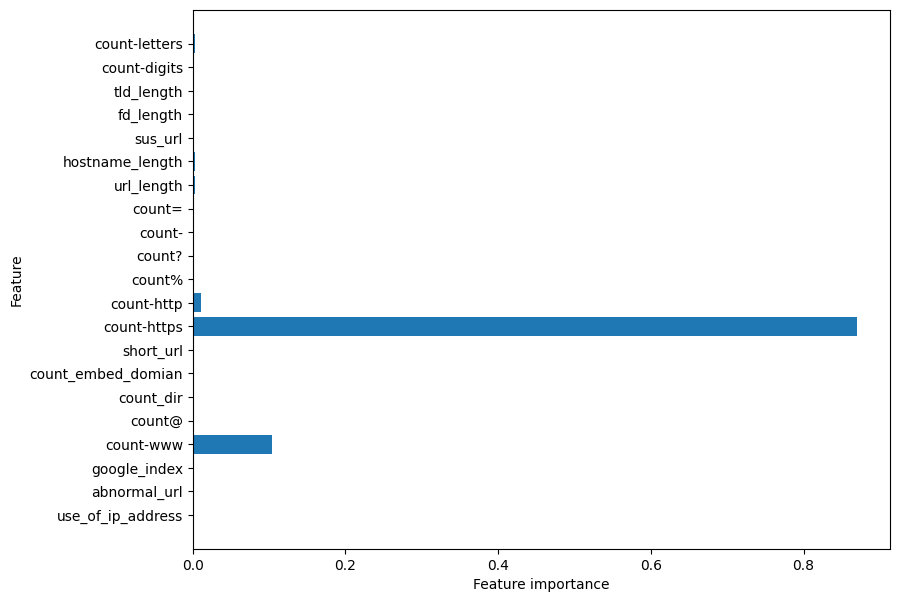

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

# Fit the DecisionTreeClassifier to your training data
tree.fit(X_train, y_train)  # This line is crucial

# Assign the trained model to classifier (optional, as tree is already trained)
classifier = tree

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), classifier.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

<ipython-input-93-50f750ed7a03>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


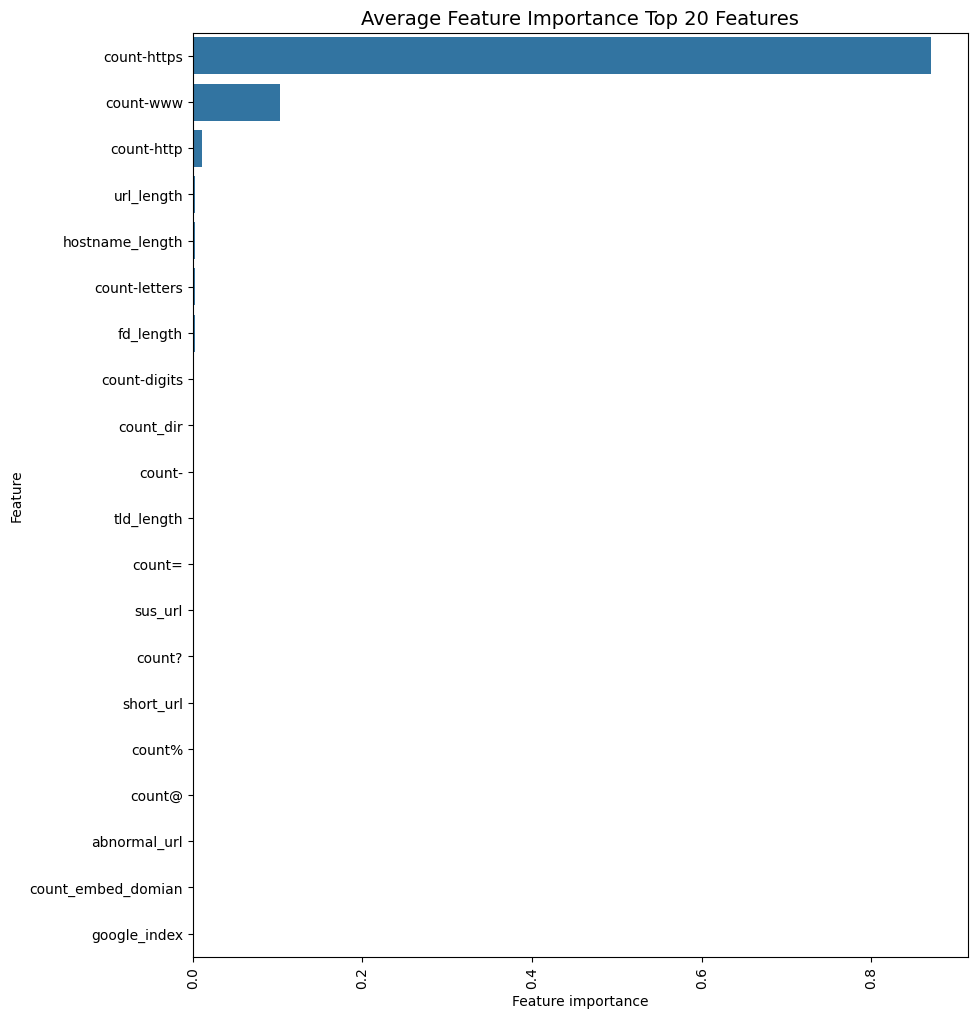

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances = classifier.feature_importances_

feature_dataframe = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': feature_importances})

def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': feature_dataframe['Feature importance'].values})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('Average Feature Importance Top 20 Features',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
plot_feature_importance()

# Class Prediction

In [ ]:
def get_url(url):

    status = []

    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))

    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)

    status.append(tld_length(tld))

    return status

In [ ]:
def model_predict1(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = tree.predict(features_test)
    if int(pred[0]) == 0:
        res="legimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

def model_predict2(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = forest.predict(features_test)
    if int(pred[0]) == 0:
      res="legimate"
      return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

def model_predict3(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = xgb_model.predict(features_test)
    if int(pred[0]) == 0:
      res="legimate"
      return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res



def model_predict4(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res


def model_predict5(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = lr_regression.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

def model_predict6(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = lda_model.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

def model_predict7(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = LGB_C.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res


def model_predict8(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = ab_classifier.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

def model_predict9(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = gn.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res


In [ ]:
urls = ['https://www.youtube.com/',
        'https://www.kaggle.com/',
        'https://www.southbankmosaics.com',
        'https://www.facebook.com/',
        'mfacebook-com.vn',
        'https://chatgpt.com/',
        'http://kaizenpak.com/2/https',
        'http://1337x.to/torrent/1110018/Blackhat-2015-RUSSIAN-720p-WEB-DL-DD5-1-H264-RUFGT/',
        'http://1337x.to/torrent/1122940/Blackhat-2015-x264-1080p-WEB-DL-eng-nl-subs-sharky/',
        'http://u1047531.cp.regruhosting.ru/acces-inges-20200104-t452/3facd',
        'https://www.linkedin.com/in/le-nam-8264291bb/',
        'http://jsfiddle.net/coinbaseethereum/jpL9n72s/show/',
        'https://www.instagram.com/']

print("DecisionTreeClassifier")
for url in urls:
     print(model_predict1(url))

print("----------------------------------------------")
print("RandomForest")
for url in urls:
     print(model_predict2(url))

print("----------------------------------------------")
print("XGB")
for url in urls:
     print(model_predict3(url))

print("----------------------------------------------")
print("K-nearest")
for url in urls:
     print(model_predict4(url))

print("----------------------------------------------")
print("Logistic Regresion")
for url in urls:
     print(model_predict5(url))

print("----------------------------------------------")
print("Linear Discriminant Analysis ")
for url in urls:
     print(model_predict6(url))

print("----------------------------------------------")
print("LightGBM")
for url in urls:
     print(model_predict7(url))

print("----------------------------------------------")
print("Ada Boost Classifier")
for url in urls:
     print(model_predict8(url))

print("----------------------------------------------")
print("GaussianNB")
for url in urls:
     print(model_predict9(url))

DecisionTreeClassifier
legimate
legimate
legimate
legimate
phishing
phishing
phishing
phishing
phishing
phishing
legimate
phishing
legimate
----------------------------------------------
RandomForest
legimate
legimate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local

legimate
legimate
phishing
phishing


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


phishing
phishing
phishing
phishing


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


legimate
phishing
legimate
----------------------------------------------
XGB
legimate
legimate
legimate
legimate
phishing
legimate
phishing
phishing
phishing
phishing
legimate
phishing
legimate
----------------------------------------------
K-nearest
legitimate
legitimate
legitimate
legitimate
phishing
phishing
phishing
phishing
phishing
phishing
legitimate
phishing
legitimate
----------------------------------------------
Logistic Regresion
legitimate
legitimate
legitimate
legitimate
legitimate
phishing
phishing
phishing
phishing
phishing
legitimate
phishing
legitimate
----------------------------------------------
Linear Discriminant Analysis 
legitimate
legitimate
legitimate
legitimate
phishing
phishing
phishing
phishing
phishing
phishing
legitimate
phishing
legitimate
----------------------------------------------
LightGBM
[LightGBM] [Warning] Unknown parameter: silent
legitimate
[LightGBM] [Warning] Unknown parameter: silent
legitimate
[LightGBM] [Warning] Unknown parameter: sile

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local

legitimate
[LightGBM] [Warning] Unknown parameter: silent
legitimate
[LightGBM] [Warning] Unknown parameter: silent
phishing
[LightGBM] [Warning] Unknown parameter: silent
legitimate
[LightGBM] [Warning] Unknown parameter: silent
phishing
[LightGBM] [Warning] Unknown parameter: silent
phishing
[LightGBM] [Warning] Unknown parameter: silent
phishing
[LightGBM] [Warning] Unknown parameter: silent
phishing
[LightGBM] [Warning] Unknown parameter: silent
legitimate
[LightGBM] [Warning] Unknown parameter: silent
phishing
[LightGBM] [Warning] Unknown parameter: silent
legitimate
----------------------------------------------
Ada Boost Classifier
legitimate
legitimate
legitimate
legitimate
phishing
phishing


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

phishing
phishing
phishing
phishing
legitimate
phishing
legitimate
----------------------------------------------
GaussianNB
legitimate
legitimate
phishing
legitimate
phishing
phishing
phishing
phishing
phishing
phishing
phishing
phishing
legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist

In [ ]:
from joblib import dump

dump(xgb_model, 'XGBoost.joblib')
dump(ab_classifier, 'AdaptiveBoosting.joblib')
dump(lda_model, 'LDA.joblib')
# dump(classifier3, 'GaussianNB.joblib')
dump(tree, 'DecisionTreeClassifier.joblib')
dump(forest, 'RandomForestClassifier.joblib')
# dump(classifier1, 'LogisticRegression.joblib')
dump(classifier, 'KNeighborsClassifier.joblib')
# dump(classifier2, 'LighGBM.joblib')

['KNeighborsClassifier.joblib']